<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Unsupervised Learning/Week 1'
os.chdir(new_directory)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils import*
%matplotlib inline

In [5]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype = int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx


In [6]:
X = load_data()

In [12]:
initial_centroids = np.array([[3,3], [6,2],[8,5]])
idx = find_closest_centroids(X, initial_centroids)

In [8]:
def compute_centroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))

    for k in range(K):
        points = X[idx==k]
        centroids[k] = np.mean(points, axis = 0)

    return centroids

In [13]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [23]:
def run_kMeans(X, initial_centroids, max_iters=50, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx


K-Means iteration 0/4
K-Means iteration 1/4
K-Means iteration 2/4
K-Means iteration 3/4
K-Means iteration 4/4


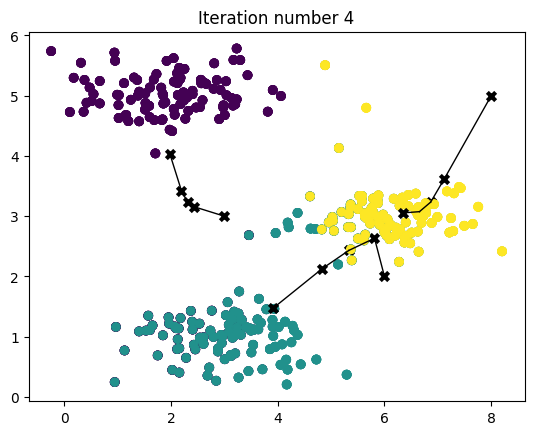

In [26]:
X = load_data()
initial_centroids = np.array([[3,3],[6,2], [8,5]])
K = 3
max_iters = 5
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)